## Data Analytics and Visualization
#### *car_crashes2.csv* and *mpg3.csv* datasets


### This homework will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [288]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [289]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## Loading Car Crashes dataset Number 2 ##

In [290]:
crash = pd.read_csv("car_crashes2.csv")
print(crash.shape)
crash.head()

(52, 10)


,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,East South Central
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Pacific
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Mountain
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,West South Central
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Pacific


* accidents is the total number of crashes for each state
* speeding is the average speeding in each state

In [291]:
crash.region.unique()

array(['South', 'West', 'Northeast', 'Midwest', 'Territory'], dtype=object)

In [292]:
crash.division.unique()

array(['East South Central', 'Pacific', 'Mountain', 'West South Central',
       'New England', 'South Atlantic', 'East North Central',
       'West North Central', 'Middle Atlantic', 'Territory'], dtype=object)

## Question 1. Check if there are any null or NA

In [293]:
print(crash.isnull().any())

accidents         False
speeding           True
alcohol           False
not_distracted    False
no_previous       False
ins_premium       False
ins_losses        False
state             False
region            False
division          False
dtype: bool


## Question 2. Remove any rows that has null or NA

In [294]:
crash = crash.dropna()
print(crash.isnull().any())

accidents         False
speeding          False
alcohol           False
not_distracted    False
no_previous       False
ins_premium       False
ins_losses        False
state             False
region            False
division          False
dtype: bool


## Question 3. Check if there is any outliers in the alcohol field using both scatter and boxplot

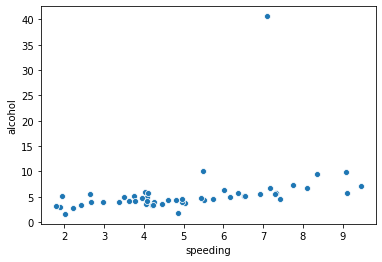

In [295]:
sns.scatterplot(x = 'speeding', y = 'alcohol', data=crash)

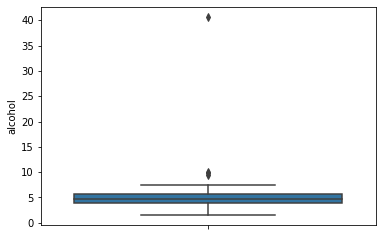

In [296]:
sns.boxplot(y=crash['alcohol'])

## Question 4. Display and then Remove the one outlier row. You should now have 50 rows

In [297]:
print("Before removal: ", crash.shape)

crash = crash[crash.alcohol < 20]

print("After removal: ", crash.shape)

Before removal:  (51, 10)
After removal:  (50, 10)


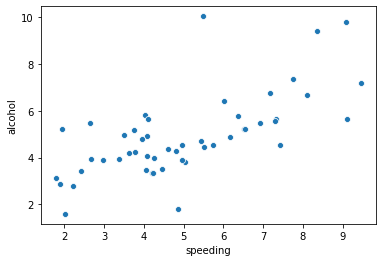

In [298]:
sns.scatterplot(x = 'speeding', y = 'alcohol', data=crash)

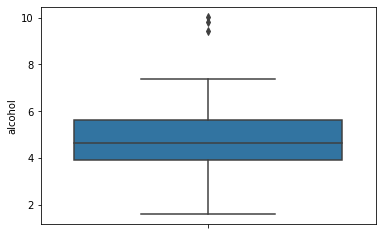

In [299]:
sns.boxplot(y=crash['alcohol'])

## Question 5. Calculate the average speeding in usa and Northeast region using SQL

In [300]:
crashs =  ps.sqldf("SELECT AVG(speeding) as 'Average Speed (USA)', AVG(CASE WHEN region = 'Northeast' THEN speeding END) AS 'Average Speed (Northeast)' FROM crash")
print(crashs.head(50))

   Average Speed (USA)  Average Speed (Northeast)
0              5.01944                    4.42475


## Question 6. Calculate the average alcohol for each region using SQL

In [303]:
crasha =  ps.sqldf("SELECT AVG(alcohol) as 'Average Alcohol', region FROM crash group by region")
print(crasha.head(50))

   Average Alcohol     region
0         4.996917    Midwest
1         3.980500  Northeast
2         5.414647      South
3         4.754077       West


## Question 7. Calculate the number of occurrences, mean, min, max of the speeding for each divison using SQL

In [304]:
crashm =  ps.sqldf("SELECT division, count(division) as count, AVG(speeding) as mean, min(speeding) as min, max(speeding) as max FROM crash group by division")
print(crashm.head(50))

             division  count      mean    min    max
0  East North Central      5  4.106600  3.384  4.968
1  East South Central      4  4.533250  2.640  7.332
2     Middle Atlantic      2  5.446000  1.792  9.100
3            Mountain      8  5.812250  3.496  8.346
4         New England      6  4.084333  1.886  5.738
5             Pacific      5  5.949400  4.200  9.450
6      South Atlantic      9  5.030444  2.006  9.082
7  West North Central      7  4.293429  1.937  6.923
8  West South Central      4  6.333750  4.032  7.760


## Question 8. Answer Question 7 but use Pandas functions

In [305]:
print(crash.groupby("division")["speeding"].describe()[['count','mean','min','max']])

                    count      mean    min    max
division                                         
East North Central    5.0  4.106600  3.384  4.968
East South Central    4.0  4.533250  2.640  7.332
Middle Atlantic       2.0  5.446000  1.792  9.100
Mountain              8.0  5.812250  3.496  8.346
New England           6.0  4.084333  1.886  5.738
Pacific               5.0  5.949400  4.200  9.450
South Atlantic        9.0  5.030444  2.006  9.082
West North Central    7.0  4.293429  1.937  6.923
West South Central    4.0  6.333750  4.032  7.760


## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the accidents, speeding, alcohol for each region

In [307]:
a = crash.groupby("region")[["accidents", "speeding", "alcohol"]].agg(['std'])
b = crash.groupby("region")[["accidents", "speeding", "alcohol"]].agg(['skew'])
c = crash.groupby("region")[["accidents", "speeding", "alcohol"]].apply(pd.DataFrame.kurtosis).add_prefix('(').add_suffix(', kurtosis)')
print(pd.concat([a, b, c], axis = 1))

           (accidents, std)  (speeding, std)  (alcohol, std)  \
region                                                         
Midwest            3.588988         1.537451        1.824432   
Northeast          3.077453         2.327773        0.872950   
South              4.537037         2.220711        1.773576   
West               3.325118         1.803138        1.910356   

           (accidents, skew)  (speeding, skew)  (alcohol, skew)  \
region                                                            
Midwest             0.950845          0.121197         2.093467   
Northeast           0.777587          1.051666         0.764250   
South              -1.125839          0.172035         0.330988   
West                0.064819          0.697441         1.159752   

           (accidents, kurtosis)  (speeding, kurtosis)  (alcohol, kurtosis)  
region                                                                       
Midwest                 2.067092             -0.737061  

## Question 10. Plot the histogram of accidents distribution for different region using 5 bins

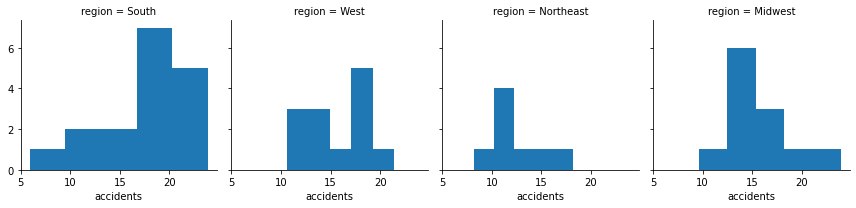

In [267]:
crashh = sns.FacetGrid(crash, col = 'region')
crashh = crashh.map(plt.hist, 'accidents', bins=5)

## Question 11. How would you describe the accidents distribution for different region based on the Skew and Kurotsis?
(i.e. who has positive and negative skew and who has positive and negative Kurotsis)

In [308]:
print("The skew of the accident distribution in the Midwest (0.95), Northeast (0.78), and West (0.06) is positive (mean and median greater than mode).")
print("The skew of the accident distribution in the South (-1.13) is negative (mean and median less than mode).")
print("The kurtosis of the accident distribution in the Midwest (2.07), South (1.86), and Northeast (0.73) is positive (leptokurtic), has more outliers, and a higher peak.")
print("The kurtosis of the accident distribution in the West (-1.05) is negative (platykurtic), has less outliers, and a lower peak.")

The skew of the accident distribution in the Midwest (0.95), Northeast (0.78), and West (0.06) is positive (mean and median greater than mode).
The skew of the accident distribution in the South (-1.13) is negative (mean and median less than mode).
The kurtosis of the accident distribution in the Midwest (2.07), South (1.86), and Northeast (0.73) is positive (leptokurtic), has more outliers, and a higher peak.
The kurtosis of the accident distribution in the West (-1.05) is negative (platykurtic), has less outliers, and a lower peak.


## Question 12. Calculate correlation of all the factors among themselves and determine which factors among speeding, alcohol and ins_premium will affect accidents the most?

In [309]:
print(crash.corr())
print("\n")
print("The highest correlation exists between accidents and alcohol at .85 among the three factors listed.")

                accidents  speeding   alcohol  not_distracted  no_previous  \
accidents        1.000000  0.608632  0.850706        0.826209     0.956009   
speeding         0.608632  1.000000  0.667377        0.585337     0.568831   
alcohol          0.850706  0.667377  1.000000        0.730435     0.780696   
not_distracted   0.826209  0.585337  0.730435        1.000000     0.745712   
no_previous      0.956009  0.568831  0.780696        0.745712     1.000000   
ins_premium     -0.174157 -0.059254 -0.146921       -0.157416    -0.119067   
ins_losses      -0.025507 -0.059624 -0.103849       -0.068733     0.007872   

                ins_premium  ins_losses  
accidents         -0.174157   -0.025507  
speeding          -0.059254   -0.059624  
alcohol           -0.146921   -0.103849  
not_distracted    -0.157416   -0.068733  
no_previous       -0.119067    0.007872  
ins_premium        1.000000    0.625381  
ins_losses         0.625381    1.000000  


The highest correlation exists betwee

### Now Load a different dataset (MPG dataset number 3)

In [310]:
mpg = pd.read_csv("mpg3.csv")
print(mpg.shape)
mpg.head()

(405, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


## Question 13: Check to see if there are any missing values. Fix the missing values by imputing value from the mean.

In [311]:
print(mpg.isnull().any())
print("\n")
print("Yes, there are missing values in mpg, horsepower, weight")

mpg              True
cylinders       False
displacement    False
horsepower       True
weight           True
acceleration    False
model_year      False
origin          False
name            False
dtype: bool


Yes, there are missing values in mpg, horsepower, weight


### Type your code here to fix the missing values by imputing value from the mean

In [312]:
mpg['mpg'] = mpg['mpg'].fillna(mpg['mpg'].mean())
mpg['horsepower'] = mpg['horsepower'].fillna(mpg['horsepower'].mean())
mpg['weight'] = mpg['weight'].fillna(mpg['weight'].mean())
print(mpg.isnull().any())

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool
